In [ ]:
# Homework 2 Solutions

#### 100 points total

## Instructions
### For the conceptual questions
Please type your answers in the provided markdown cell below the problem. To edit a markdown cell, simply double click it.

### For the simulation/coding questions
In order to complete the coding assignment for this homework, you must have *__masspy__* installed in your current Python 3 environment. To easily install masspy, one must run the following command in an open command prompt/terminal ``pip install masspy``. Alternatively, one can run the following in a Jupyter cell (be sure to remove the installation cell in your final homework submission!.

``import sys
!{sys.executable} -m pip install masspy``

Ensure you are using masspy version "0.1.0b1". To check the version, run the following code:

``import mass
print(mass.__version__)``

### Other important information

* __Make sure to title the homework assignment as LASTNAME_FIRSTNAME_Homework2 before submitting.__

* All plots generated must have an xlabel, a ylabel, and a caption that interprets the plot. Time profiles also require a legend. 

* To create a caption, add a new cell below a plot by using the option "Insert > Insert Cell below", then change the cell into a markdown cell by using "Cell > Cell Type > Markdown".

* Axis limits must be sensible, meaning that you may need to set the axis limits via kwargs "xlim" and "ylim" in order to make your plot more interpretable. 

* Need help making a matrix in LaTeX? https://www.overleaf.com/learn/latex/Questions/How_to_create_matrices_in_LaTeX

------
## Conceptual questions (25 points total)
Please type your answers below. 

### (1) What is a pooled variable and why are they used? Define a disequilibrium and a conservation pool. (10 points)

<font color='red'>Solution: </font> Pooled variables are variables constructed from individual molecules in a system that have similar net rates of change (i.e., similar time constants). They are used to simplify the system and can be used to represent physiologically-meaningful quantities. They simplify the system by allowing the system's response at a particular time scale to be simulated without worrying about dynamics at time scales on different orders of magnitude.


A disequilibrium pool is a pool that is a thermodynamic driver for a reaction and whose concentration approaches zero over time.


A conservation pool is a pool formed from the total sum of reactants in a closed system.

<font color='red'>Rubric: </font> 5 points for 2/3 equivalent sentences present in first part, 2.5 points each for 2nd and 3rd parts

### (2) Determine the two pools for the following set of reactions (8 points):

$$x_1 {\stackrel{v_1}{\rightleftharpoons}} x_2 {\stackrel{v_2}{\rightleftharpoons}} x_3 {\stackrel{v_3}{\rightarrow}} x_4 \tag{1}$$

where \\(k_1 == k_2 >> k_3 \\).


<font color='red'>Solution: </font> On very short timescales, \\(x_1\\), \\(x_2\\), and \\(x_3\\) will be pooled. At very long timescales, and because this is a closed system, \\(x_1\\), \\(x_2\\), \\(x_3\\) and \\(x_4\\) form a conservation pool.

$$\begin{align} p_1 &= x_1 + x_2 + x_3\ &&(\text{fast})\ \\ p_2 &= x_1 + x_2 + x_3 + x_4\ &&(\text{slow}) \end{align}$$

<font color='red'>Solution: </font> 4 points for each pool identified and explained

### (3): Add a fourth pool to Eq. (2) (shown below) that represents the total number of phosphodiester bonds. (7 points)

The pool formation discussed in Chapter 2 can be described by the pool transformation matrix:

$$\textbf{P} = \begin{pmatrix} {1} & {1} & {0} \\ {2} & {1} & {0} \\ {1} & {1} & {1} \\ \end{pmatrix} \tag{2}$$

and thus 

$$\textbf{p} = \textbf{Px} = \textbf{P}\begin{pmatrix} {ATP} \\ {ADP} \\ {AMP}\\ \end{pmatrix} = \begin{pmatrix} {ATP + ADP} \\ {2 ATP + ADP} \\ {ATP + ADP + AMP}\\ \end{pmatrix} \tag{3}$$

Fill in the matrix below to provide a solution.

<font color='red'>Solution </font>:

$$\textbf{P} = \begin{pmatrix} {1} & {1} & {0} \\ {2} & {1} & {0} \\ {1} & {1} & {1} \\ {3} & {2} & {1} \\ \end{pmatrix}$$

and thus 

$$\textbf{p} = \textbf{Px} = \textbf{P}\begin{pmatrix} {ATP} \\ {ADP} \\ {AMP}\\ \end{pmatrix} = \begin{pmatrix} {ATP + ADP} \\ {2 ATP + ADP} \\ {ATP + ADP + AMP}\\ {3 ATP + 2 ADP + 1 AMP}\\ \end{pmatrix}$$

<font color='red'>Rubric: </font> No partial credit

------
## Simulation Questions (75 points total)

In [1]:
from mass import MassModel, MassMetabolite, MassReaction, Simulation
from mass.visualization import plot_phase_portrait, plot_tiled_phase_portraits, plot_time_profile

import pandas as pd
import matplotlib.pyplot as plt

### (4) Consider the following reaction scheme (15 points):

$$x_1 {\stackrel{v_1}{\rightleftharpoons}} x_2 {\stackrel{v_2}{\rightleftharpoons}} x_3 {\stackrel{v_3}{\rightarrow}} x_4 \tag{4}$$

> Simulate over the time of \\(0\\) to \\(10^6\\) and plot the time profile of the concentrations.
Set initial conditions/parameters as follows:
* \\(k_1 = 1,\ k_2 = 0.01,\ k_3 = 0.0001,\\)
* \\(K_1 = K_2 = 2\\)
* \\(x_1(0) = 1,\ x_2(0) = x_3(0) = x_4(0) = 0\\)

> Suggest a pool forming matrix, \\(\textbf{P}\\) to generate dynamically independent pools.

> Post-process \\(\textbf{x}(t)\\) with your suggested \\(\textbf{P}\\) and plot these phase portraits for the pools. Did your pool formation matrix generate dynamically independent pools?

Steps have been put in place to assist you. Enter your solutions in the space provided beneath each step.

#### Step 1: Define the stoichiometric matrix

In [2]:
# Define metabolites
x1 = MassMetabolite('x1')
x2 = MassMetabolite('x2')
x3 = MassMetabolite('x3')
x4 = MassMetabolite('x4')

# Define reactions
v1 = MassReaction('v1')
v2 = MassReaction('v2')
v3 = MassReaction('v3', reversible=False)

# Add metabolites to the reactions
v1.add_metabolites({x1 : -1, x2 : 1})
v2.add_metabolites({x2 : -1, x3 : 1})
v3.add_metabolites({x3 : -1, x4 : 1})

# Create the MassModel object and add the reactions to the model
model = MassModel('Model')
model.add_reactions([v1, v2, v3])

model.update_S(array_type='DataFrame', update_model=True)
model.S

,v1,v2,v3
x1,-1.0,0.0,0.0
x2,1.0,-1.0,0.0
x3,0.0,1.0,-1.0
x4,0.0,0.0,1.0


<font color='red'>Rubric: </font> 1 point for successful creation of model

#### Step 2: Define initial conditions and parameter values

In [3]:
v1.kf = 1
v2.kf = 0.01
v3.kf = 0.0001

v1.Keq = 2
v2.Keq = 2

model.update_initial_conditions({x1: 1, x2: 0, x3: 0, x4: 0})

<font color='red'>Rubric: </font> 0.5 points for successful addition of model parameters

#### Step 3: Solve

In [4]:
t0, tf = (0, 1e6)
sim = Simulation(model)
conc_sol, flux_sol = sim.simulate(model, (t0, tf), verbose=True)

Getting time points
Setting simulation values for 'Model'
Simulating 'Model'
Simulation for 'Model' successful
Adding 'Model' simulation solutions to output
Updating stored solutions


<font color='red'>Rubric: </font> 0.5 points for successful solving of model

#### Step 4: Plot and briefly summarize results

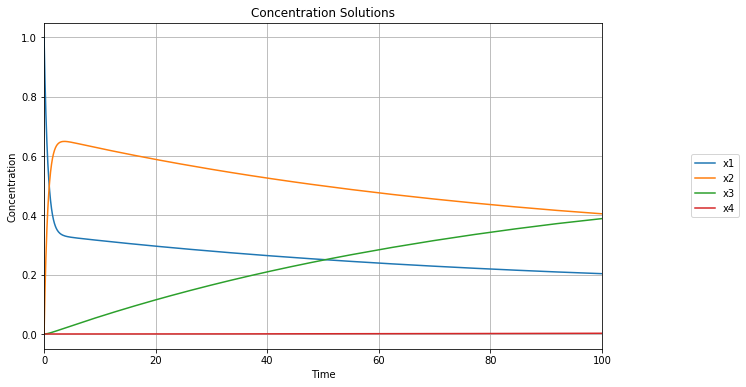

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

plot_time_profile(
    conc_sol,
    ax=ax,
    legend="right outside", 
    xlim=[0,100],
    xlabel="Time",
    ylabel="Concentration",
    title=("Concentration Solutions", {"size": "large"}),
    grid=("major", "both")
);

<font color='red'>Solution: </font> This time profile shows the cascading transformation of species in this series of reactions. x1 is gradually converted to x2, then x3, and finally everything is converted to x4. 

<font color='red'>Rubric: </font> 1 points for successful plot, 2 points for describing contents of plot

#### Step 5: Define pool forming matrix and briefly explain pools

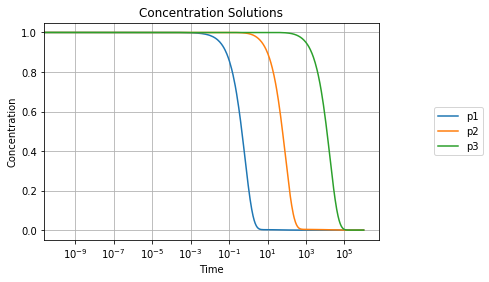

In [6]:
p_matrix = [[1, -.5, 0, 0],
            [1, 1, -.75, 0],
            [1, 1, 1, 0]]

conc_sol.make_aggregate_solution(
    aggregate_id='p1',
    equation='x1 - 0.5*x2',
    variables=['x1', 'x2'],
    update=True
)
conc_sol.make_aggregate_solution(
    aggregate_id='p2',
    equation='x1 + x2 - 0.75*x3',
    variables=['x1', 'x2', 'x3'],
    update=True
)
conc_sol.make_aggregate_solution(
    aggregate_id='p3',
    equation='x1 + x2 + x3',
    variables=['x1', 'x2', 'x3'],
    update=True
)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_time_profile(conc_sol, observable=['p1', 'p2', 'p3'], ax=ax, legend="right outside", 
                plot_function="semilogx",
                xlabel="Time", ylabel="Concentration",
                title=("Concentration Solutions", {"size": "large"}),
                grid=("major", "both"));


<font color='red'>Solution: </font> 

* Observe that at t=~5, x1 and x2 relax together, with x3 being 0. (Disequilibrium)

* Observe that at t=~500, (x1 + x2) and x3 relax together, with x4 being 0.(Disequilibrium)

* Observe that a pool exists for x1 + x2 + x3 + x4 (Conservation)

$$\textbf{P} = \begin{pmatrix} {1} & {-0.5} & {0} & {0} \\ {1} & {1} & {-3/4} & {0} \\ {1} & {1} & {1} & {0} \\  \end{pmatrix}$$

and thus $\textbf{p} = \textbf{Px} = \textbf{P}\begin{pmatrix} {x_1} \\ {x_2} \\ {x_3}\\ \end{pmatrix} = \begin{pmatrix} {x_1 - 0.5 x_2} \\ {x_1 + x_2 - 0.75 x_3} \\ {x_1 + x_2 + x_3}\\  \end{pmatrix}$

<font color='red'>Rubric: </font> 1 points for successful formation/plotting of pools; 4 points for describing types of pools

#### Step 6: Plot pool phase portraits and briefly explain results

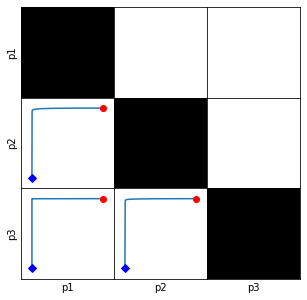

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_tiled_phase_portraits(conc_sol, observable=['p1', 'p2', 'p3'], ax=ax, plot_tile_placement='lower')

<font color='red'>Solution: </font> The pool phase portraits show that the 3 pools are dynamically independent, exhibiting a characteristic 'L' shape showing that the dynamics are either entirely in the direction of one pool or the other, but never both simultaneously. 

<font color='red'>Rubric: </font> 1 points for successful plot, 4 points for describing contents of plot/answering question

------
### (5) Consider adding one additional reaction to the reaction scheme from Problem (4) (30 points):

$$x_1 {\stackrel{v_1}{\rightleftharpoons}} x_2 {\stackrel{v_2}{\rightleftharpoons}} x_3 {\stackrel{v_3}{\rightleftharpoons}} x_4 {\stackrel{v_4}{\rightarrow}} x_5 \tag{5}$$

>  Redo the analysis performed in Problem (4) with the one additional reaction:
* \\(k_1 = 1,\ k_2 = 0.01,\ k_3 = 0.0001, k_4 = 0.000001\\)
* \\(K_1 = K_2 = K_3 = 1\\)
* \\(x_1(0) = 1,\ x_2(0) = x_3(0) = x_4(0) = x_5(0) = 0\\)

>  What is the appropriate form for **P** to get dynamically independent pools?

>  Can you generalize this result to $5, 6, 7, ... n$ reversible linear reactions in a series where all the equilibrium constants are unity?

>  What happens if the reactions are irreversible? Provide the name for the resulting effect on species/pools separated by an irreversible reaction. 

Steps have been put in place to assist you. Enter your solutions in the space provided beneath each step.

#### Step 1: Define the stoichiometric matrix

In [8]:
# Define metabolites
x1 = MassMetabolite('x1')
x2 = MassMetabolite('x2')
x3 = MassMetabolite('x3')
x4 = MassMetabolite('x4')
x5 = MassMetabolite('x5')

# Define reactions
v1 = MassReaction('v1')
v2 = MassReaction('v2')
v3 = MassReaction('v3')
v4 = MassReaction('v4', reversible=False)

# Add metabolites to the reactions
v1.add_metabolites({x1 : -1, x2 : 1})
v2.add_metabolites({x2 : -1, x3 : 1})
v3.add_metabolites({x3 : -1, x4 : 1})
v4.add_metabolites({x4 : -1, x5 : 1})

# Create the MassModel object and add the reactions to the model
model = MassModel('Model')
model.add_reactions([v1, v2, v3, v4])

model.update_S(array_type='DataFrame', update_model=True)
model.S

,v1,v2,v3,v4
x1,-1.0,0.0,0.0,0.0
x2,1.0,-1.0,0.0,0.0
x3,0.0,1.0,-1.0,0.0
x4,0.0,0.0,1.0,-1.0
x5,0.0,0.0,0.0,1.0


<font color='red'>Rubric: </font> 1 points for successful creation of model

#### Step 2: Define initial conditions and parameter values

In [9]:
v1.kf = 1
v2.kf = 0.01
v3.kf = 0.0001
v4.kf = 0.000001

v1.Keq = 1
v2.Keq = 1
v3.Keq = 1

model.update_initial_conditions({x1: 1, x2: 0, x3: 0, x4: 0, x5: 0})

<font color='red'>Rubric: </font> 1 point for successful definition of parameters

#### Step 3: Solve

In [10]:
t0, tf = (0, 1e8)
sim = Simulation(model)
conc_sol, flux_sol = sim.simulate(model, (t0, tf))

<font color='red'>Rubric: </font> 1 point for successful solving of model

#### Step 4: Plot and briefly summarize results

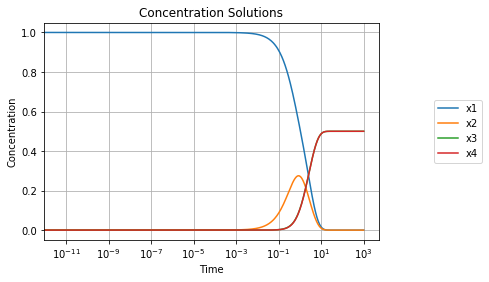

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_time_profile(
    conc_sol,
    ax=ax,
    legend="right outside", 
    plot_function="semilogx",
    xlabel="Time",
    ylabel="Concentration",
    title=("Concentration Solutions", {"size": "large"}),
    grid=("major", "both")
);

<font color='red'>Solution: </font> This time profile shows the cascading transformation of species in this series of reactions. Each successive rate constant is smaller than the previous one, so each reaction in the series serves as a limiter that causes the upstream product to accumulate before eventually being converted to the next metabolite in the chain.

<font color='red'>Rubric: </font> 1 point for successful plot, 3 points for describing contents of plot

#### Step 5: Define pool forming matrix and briefly explain pools

In [12]:
p_matrix = [[1, -1, 0, 0, 0],
            [1, 1, -2, 0, 0],
            [1, 1, 1, -3, 0],
            [1, 1, 1, 1, 0]]

pools = ['x1 - x2', 
         'x1 + x2',
         'x1 + x2 + x3',
         'x1 + x2 + x3 + x4']

<font color='red'>Solution: </font>
* Observe that x1 and x2 relax together, with x3 being 0. (Disequilibrium)

* Observe that (x1 + x2) and x3 relax together, with x4 being 0.(Disequilibrium)

* Observe that (x1 + x2 + x3) and x4 relax together, with x5 being 0.(Disequilibrium)

* Observe that a pool exists for x1 + x2 + x3 + x4 (Conservation)

$$\textbf{P} = \begin{pmatrix}
{1} & {-1} & {0} & {0} & {0} \\ 
{1} & {1} & {-2} & {0} & {0} \\ 
{1} & {1} & {1} & {-3} & {0} \\
{1} & {1} & {1} & {1} & {0} \\ \end{pmatrix}$$

and thus $\textbf{p} = \textbf{Px} = \textbf{P}\begin{pmatrix} {x_1} \\ {x_2} \\ {x_3}\\ {x_4} \\ \end{pmatrix} = 
\begin{pmatrix} {x_1 - x_2} \\ {x_1 + x_2 - 2x_3} \\ {x_1 + x_2 + x_3 - 3x_4}\\ {x_1 + x_2 + x_3 + x_4} \\ \end{pmatrix}$

<font color='red'>Rubric: </font> 2 points per pool defined correctly, 8 points total available

#### Step 6: Plot pool phase portraits and briefly explain results

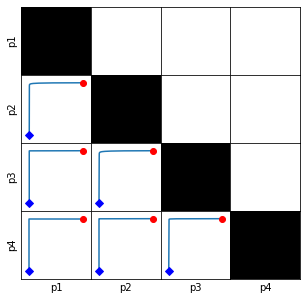

In [13]:
conc_sol.make_aggregate_solution(
    aggregate_id='p1',
    equation='x1 - x2',
    variables=['x1', 'x2'],
    update=True
)
conc_sol.make_aggregate_solution(
    aggregate_id='p2',
    equation='x1 + x2 - 2*x3',
    variables=['x1', 'x2', 'x3'],
    update=True
)
conc_sol.make_aggregate_solution(
    aggregate_id='p3',
    equation='x1 + x2 + x3 - 3*x4',
    variables=['x1', 'x2', 'x3', 'x4'],
    update=True
)
conc_sol.make_aggregate_solution(
    aggregate_id='p4',
    equation='x1 + x2 + x3 + x4',
    variables=['x1', 'x2', 'x3', 'x4'],
    update=True
)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_tiled_phase_portraits(conc_sol, observable=['p1', 'p2', 'p3', 'p4'], ax=ax, plot_tile_placement='lower');

<font color='red'>Solution: </font> The pool phase portraits show that the 4 pools are dynamically independent, exhibiting a characteristic 'L' shape showing that the dynamics are either entirely in the direction of one pool or the other, but never both simultaneously. 

<font color='red'>Rubric: </font> 1 points for successful plot, 4 points for describing contents of plot/answering question

#### Step 7: Generalized Pooling Matrix

Fill in the following pooling matrix for n reversible linear reactions.

<font color='red'>Solution: </font> 

$$P = 
\begin{pmatrix} 
{1} & {-1} & {0} & {0} & {.} & {.} & {0} \\ 
{1} & {1} & {-2} & {0} & {.} & {.} & {0} \\ 
{.}  & {.} & {.} & {.} & {.} & {.} & {0} \\ 
{.}  & {.} & {.} & {.} & {.} & {.} & {0} \\ 
{1}  & {1} & {.} & {.} & {1} & {-(n-1)} & {0} \\ 
{1}  & {1} & {1} & {1} & {1} & {1} & {0} \\ 
\end{pmatrix}$$

<font color='red'>Rubric: </font> 5 points for correct generalized matrix

#### What happens if the reactions are irreversible? Provide the name for the resulting effect on species/pools separated by an irreversible reaction. 

<font color='red'>Solution </font>:
Irreversible reactions can decouple the dynamics of a series of reactions. With irreversible reactions, the soft conservation pools (i.e. x1 + x2) may change, and a new pooling matrix may need to be defined. This separation of dynamics is called stoichiometric decoupling.

<font color='red'>Rubric: </font> 5 points total available; 2 points for naming stoichiometric decoupling specifically, 3 points for additional explanation

------
### (6) Consider the reaction scheme (30 points): 

$x_1 \underset{v_{-1}}{\stackrel{v_1}{\rightleftharpoons}} x_2 \stackrel{v_2} \rightarrow x_3 \underset{v_{-3}}{\stackrel{v_3}{\rightleftharpoons}} x_4 \tag{6}$ 

> Assign numerical values of $k_1 = k_{-1} = k_3 = k_{-3} = 1$ and $k_2 = 1, 0.1, 0.01$. Simulate the dynamics of this system for the three values of $k_2$. Interpret the dynamics in terms of the pools and the time-scale separation that occurs at low values for $k_2$.

> Show that $p_2 + p_4$ is a constant, which leads to the formation of the last line in Eq. (7).

$$\textbf{P} = \begin{pmatrix}
{1} & {-1/K_1}  & {0} & {0}       \\ 
{0} & {1}       & {0} & {0}       \\ 
{0} & {0}       & {1} & {-1/K_3}  \\ 
{1} & {1}       & {1} & {1}       \\ \end{pmatrix} \tag{7}$$

> Use $k_1 = k_{-1} = k_2 = 1$ and vary $k_3 = k_{-3} = 0.01, 1, 100$. Show that the dynamics of reaction 1 do not change.

> Use $x_1(0) = 1, x_2(0) = x_3(0) = x_4(0) = 0$ for all simulations.

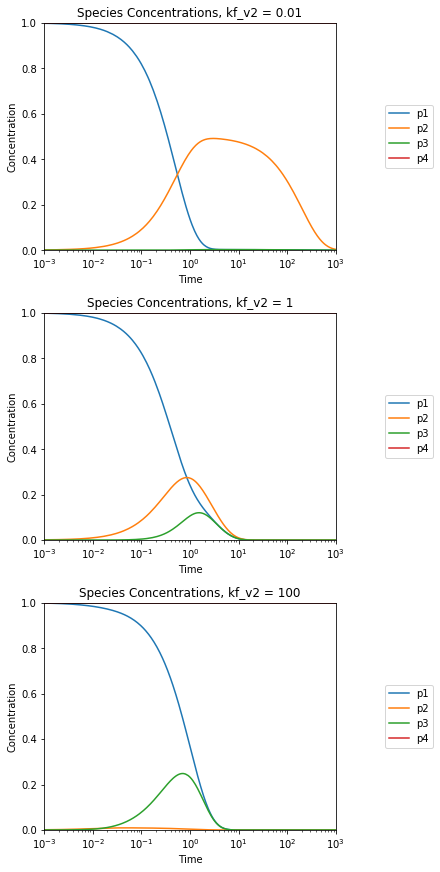

In [14]:
# Create MassModel
model = MassModel('Connected_Linear_Reversible')

# Generate the MassMetabolites 
x1 = MassMetabolite("x1")
x2 = MassMetabolite("x2")
x3 = MassMetabolite("x3")
x4 = MassMetabolite("x4")

# Generate the MassReactions 
v1 = MassReaction("v1")
v2 = MassReaction("v2", reversible=False)
v3 = MassReaction("v3")

# Add metabolites to the reaction, add reaction to the model
v1.add_metabolites({x1: -1, x2: 1})
v2.add_metabolites({x2: -1, x3: 1})
v3.add_metabolites({x3: -1, x4: 1})

model.add_reactions([v1, v2, v3])

# Set parameters and initial conditions
v1.kf = 1
v1.Keq = 1
v2.kf = 1
v3.kf = 1
v3.Keq = 1

model.update_initial_conditions({x1: 1, x2: 0, x3: 0, x4: 0})
# Simulate model
t0, tf = (0, 1000)
sim = Simulation(model)

# define pools
pool_ids = ['p1', 'p2', 'p3', 'p4']
pools = ['x1 - x2 / Keq_v1', 'x2', 
         'x3 - x4 / Keq_v3', 'x1 + x2 + x3 + x4']
pool_vars = [['x1', 'x2'], ['x2'], ['x3', 'x4'], ['x1', 'x2', 'x3', 'x4']]

param_dict = {v1.Keq_str: v1.Keq, v3.Keq_str: v3.Keq}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 12),
                         constrained_layout=True)
axes = axes.flatten()
kf_values = [0.01, 1, 100]

for new_kf, pool_eq, pool_var, ax in zip(kf_values, pools, pool_vars, axes):
    conc_sol, flux_sol = sim.simulate(model, time=(t0, tf),
                                            perturbations={"kf_v2": new_kf})
    for pool_id, pool_eq, pool_var in zip(pool_ids, pools, pool_vars):
        conc_sol.make_aggregate_solution(
            aggregate_id=pool_id,
            equation=pool_eq,
            variables=pool_var,
            parameters=param_dict
        )
    plot_time_profile(conc_sol, observable=['p1', 'p2', 'p3', 'p4'], ax=ax, 
                    legend="right outside",
                    plot_function="semilogx",
                    xlabel="Time", ylabel="Concentration",
                    xlim=(1e-3, tf), ylim=(0, 1),
                    title="Species Concentrations, kf_v2 = {0}".format(new_kf))

<font color='red'>Solution: </font> At low values of k2, we see minimal formation of pool p3, because x3 is much more rapidly converted to x4 than x2 to x3. As k2 increases, we see pool p3 become a factor, while p1 and p2 start to converge in their relaxation as x2 is more rapidly converted to x3. As expected given the irreversible reaction to separate the two reversible pools, no pool contains species from both sides of the irreversible, stoichiometric-decoupling reaction.

<font color='red'>Rubric: </font> 

- 5 points for successful model creation
- 5 points for successful pool definition and explanation
- 7 points for description of plots

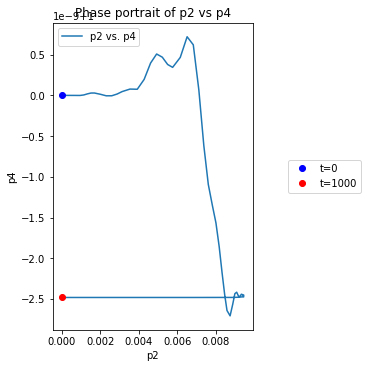

In [15]:
# Visualize solution
fig= plt.figure(constrained_layout=True, figsize=(5, 5))
gs = fig.add_gridspec(nrows=1, ncols=1)

ax = fig.add_subplot(gs[0, 0])

plot_phase_portrait(conc_sol, x="p2", y="p4", ax=ax, 
                    legend="best", xlabel="p2", ylabel="p4", 
                    title=("Phase portrait of p2 vs p4", 
                           {"size": "large"}),
                   annotate_time_points=[0, 1000],
                    annotate_time_points_color=['blue', 'red'],
                   annotate_time_points_legend="right outside");

<font color='red'>Solution: </font> A negative linear slope implies conservation between variables. Therefore, p2 + p4 is constant.

<font color='red'>Rubric: </font> 8 points for correct identification of conservation phase portrait

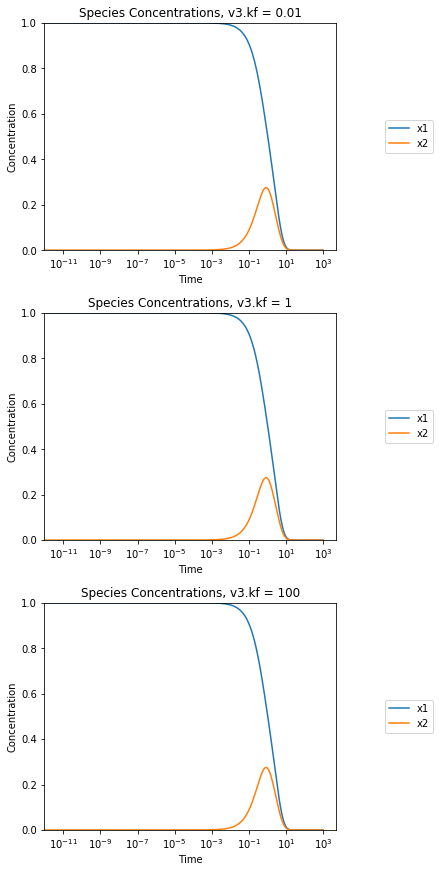

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 12),
                         constrained_layout=True)
axes = axes.flatten()
kf_values = [0.01, 1, 100]

for new_kf, ax in zip(kf_values, axes):
    conc_sol, flux_sol = sim.simulate(model, time=(t0, tf),
                                            perturbations={"kf_v3": new_kf})
    plot_time_profile(conc_sol, observable=["x1", "x2"], ax=ax, 
                    legend="right outside",
                    plot_function="semilogx",
                    xlabel="Time", ylabel="Concentration",
                    ylim=(0, 1),
                    title="Species Concentrations, v3.kf = {0}".format(new_kf))

<font color='red'>Solution: </font> The different k3 values do not affect the dynamics of x1 and x2 in the simulation.

<font color='red'>Rubric: </font> 5 points total for plots and short sentence showing no change